In [14]:
import math
import numpy as np
from numpy import random
import scipy
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io

In [15]:
def z2x(z,typ,dist_param,corrmat):
    #z=np.array([[0.117786329536724,0.906056749773236,2.28732658561840,2.11617887466017,1.92616854758541,-1.17895895833063,1.86522403656920,-0.846142058945248]])
    nvar = len(typ[0])
    z=np.array([z])
    L = np.linalg.cholesky(corrmat)
    zcorr = np.matmul(z,L)
    u = norm.cdf(zcorr)                       
    x=np.zeros([1,nvar])                     
    for ivar in range(nvar):
        if   typ[0][ivar]==1:
            x[:,ivar]=dist_param[ivar,0] + dist_param[ivar,1]*zcorr[:,ivar]
        elif typ[0][ivar]==2:
            x[:,ivar]=math.exp(dist_param[ivar,0] + dist_param[ivar,1]*zcorr[:,ivar])
        elif typ[0][ivar]==3:x[:,ivar]=dist_param[ivar,1] + (dist_param[ivar,1] - dist_param[ivar,0])*u[:,ivar]
        elif typ[0][ivar]==4:x[:,ivar]=dist_param[ivar,0] - dist_param[ivar,1]*math.log(-math.log(u[:,ivar]))
        elif typ[0][ivar]==5:
            theta=1/(dist_param[ivar,1])
            x[:,ivar]= dist_param[ivar,0]*((-math.log(-(u[:,ivar]-1)))**theta)
        
    return x

In [16]:
def Fun(D,zrand,jtau,ndefect,mu,sd,typ,dist_param,corrmat):
    xrand = z2x(zrand,typ,dist_param,corrmat)
    wt= xrand[0][0]
    sigmau= xrand[0][1]
    P= xrand[0][2]
    d01=xrand[:,3:4+ndefect-1][0][0]
    l01=xrand[:,3+ndefect:4+ndefect+ndefect][0][0]
    gd1= xrand[:,3+ndefect+ndefect:3+ndefect+ndefect+ndefect][0][0]
    gl1= xrand[:,3+ndefect+ndefect+ndefect: 4+ndefect+ndefect+ndefect+ndefect-1][0][0]
    xi= xrand[:,-1][0]
             
              
    gll1= np.zeros([1,ndefect])[0][0]
    gb1= gll1
    gl0= gll1
    gb0= gll1
              
    for idefect in range(ndefect):
        d1= d01+gd1*jtau
        l1= l01+gl1*jtau       
        gll1= 0.8*wt - d1
        gb1=xi*(2*wt*sigmau/D)*(1-(d1/wt)*(1-math.exp((-0.157*l1/(math.sqrt(D*abs((wt-d1))/2))))))-P
    
              
        if jtau>1:
            d0= d01+gd1*(jtau - 1)
            l0= l01+gl1*(jtau - 1)
            gl0=0.8*wt - d0

            gb0=xi*(2*wt*sigmau/D)*(1-(d0/wt)*(1-math.exp((-0.157*l0/(math.sqrt(D*abs((wt-d0))/2))))))-P
    
    if jtau==1:
        gl = gll1                                       
        gb = gb1                                            
    else:
        gl= gll1*gl0                                        
        gb= gb1*gb0                                          
        
    return [gl,gb]    

In [17]:
pf1=[]




#_________________________________________________________________________________________________________________________#





for jtau in range(1,11):
    N=300
    p0=0.05
    nt=round(N*p0) #15 
    ns=math.ceil(1/p0-1) #19 
    D=914 
    ndefect=10
    zrand=np.random.randn(300,(4+4*ndefect))
    z=zrand
    xrand=np.random.randn(300,(4+4*ndefect))
    n=len(xrand[0])
    
    #Paras Variable 
    NumSam=300 
    CondPro=0.05 
    MaxTry=10
    
    #Param Variable 
    D=914
    mu= np.array([[13.1400000000000,615.850000000000,10,2.62800000000000,2.62800000000000,2.62800000000000,2.62800000000000,2.62800000000000,3.94200000000000,3.94200000000000,3.94200000000000,3.94200000000000,3.94200000000000,50,50,50,50,50,50,50,50,50,50,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,5,5,5,5,5,5,5,5,5,5,1]]) 
    #print("mu:",mu,mu.shape)
    sd= np.array([[0.197100000000000,18.4755000000000,0.300000000000000,0.525600000000000,0.525600000000000,0.525600000000000,0.525600000000000,0.525600000000000,0.788400000000000,0.788400000000000,0.788400000000000,0.788400000000000,0.788400000000000,10,10,10,10,10,10,10,10,10,10,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,0.100000000000000]]) 
    #print("sd:",sd,sd.shape)
    typ=np.array([[1,2,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,5,5,5,5,5,5,5,5,5,5,2,2,2,2,2,2,2,2,2,2,2]]) 
    #print("typ:",typ,typ.shape)
    dist_param= np.transpose(np.array([ [13.1400000000000,6.42255362976608,9.86498770189838,2.62800000000000,2.62800000000000,2.62800000000000,2.62800000000000,2.62800000000000,3.94200000000000,3.94200000000000,3.94200000000000,3.94200000000000,3.94200000000000,50,50,50,50,50,50,50,50,50,50,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,-0.00497516542658391],[0.197100000000000,0.0299932532886313,0.233909040370103,0.525600000000000,0.525600000000000,0.525600000000000,0.525600000000000,0.525600000000000,0.788400000000000,0.788400000000000,0.788400000000000,0.788400000000000,0.788400000000000,10,10,10,10,10,10,10,10,10,10,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.0997513451195927]])) 
    #print("dist_param:",dist_param,dist_param.shape)
    corrmat = scipy.io.loadmat('C:\\Users\\Swapnil\\OneDrive\\Desktop\\corrmata')
    corrmat=corrmat['mat1']
    #print("corrmat:",corrmat,corrmat.shape)
    ##print(corrmat,corrmat.shape)
    
#     #Param Variable 
#     D=914
#     mu= np.array([[13.1400000000000,615.850000000000,10,2.62800000000000,2.62800000000000,2.62800000000000,2.62800000000000,2.62800000000000,3.94200000000000,3.94200000000000,3.94200000000000,3.94200000000000,3.94200000000000,50,50,50,50,50,50,50,50,50,50,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,5,5,5,5,5,5,5,5,5,5,1]]) 
#     #print("mu:",mu,mu.shape)
#     sd= np.array([[0.197100000000000,18.4755000000000,0.300000000000000,0.525600000000000,0.525600000000000,0.525600000000000,0.525600000000000,0.525600000000000,0.788400000000000,0.788400000000000,0.788400000000000,0.788400000000000,0.788400000000000,10,10,10,10,10,10,10,10,10,10,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,0.100000000000000]]) 
#     #print("sd:",sd,sd.shape)
#     typ=np.array([[1,2,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,5,5,5,5,5,5,5,5,5,5,2,2,2,2,2,2,2,2,2,2,2]]) 
#     #print("typ:",typ,typ.shape)
#     dist_param= np.transpose(np.array([ [13.1400000000000,6.42255362976608,9.86498770189838,2.62800000000000,2.62800000000000,2.62800000000000,2.62800000000000,2.62800000000000,3.94200000000000,3.94200000000000,3.94200000000000,3.94200000000000,3.94200000000000,50,50,50,50,50,50,50,50,50,50,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,-0.00497516542658391],[0.197100000000000,0.0299932532886313,0.233909040370103,0.525600000000000,0.525600000000000,0.525600000000000,0.525600000000000,0.525600000000000,0.788400000000000,0.788400000000000,0.788400000000000,0.788400000000000,0.788400000000000,10,10,10,10,10,10,10,10,10,10,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.0997513451195927]])) 
#     #print("dist_param:",dist_param,dist_param.shape)
#     corrmat = scipy.io.loadmat('C:\\Users\\Swapnil\\OneDrive\\Desktop\\corrmata')
#     corrmat=corrmat['mat1']
#     #print("corrmat:",corrmat,corrmat.shape)
#     ##print(corrmat,corrmat.shape)
    
#     #Param Variable 
#     D=914
#     mu= np.array([[13.1400000000000,615.850000000000,10,2.62800000000000,2.62800000000000,2.62800000000000,2.62800000000000,2.62800000000000,3.94200000000000,3.94200000000000,3.94200000000000,3.94200000000000,3.94200000000000,50,50,50,50,50,50,50,50,50,50,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,5,5,5,5,5,5,5,5,5,5,1]]) 
#     #print("mu:",mu,mu.shape)
#     sd= np.array([[0.197100000000000,18.4755000000000,0.300000000000000,0.525600000000000,0.525600000000000,0.525600000000000,0.525600000000000,0.525600000000000,0.788400000000000,0.788400000000000,0.788400000000000,0.788400000000000,0.788400000000000,10,10,10,10,10,10,10,10,10,10,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,0.100000000000000]]) 
#     #print("sd:",sd,sd.shape)
#     typ=np.array([[1,2,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,5,5,5,5,5,5,5,5,5,5,2,2,2,2,2,2,2,2,2,2,2]]) 
#     #print("typ:",typ,typ.shape)
#     dist_param= np.transpose(np.array([ [13.1400000000000,6.42255362976608,9.86498770189838,2.62800000000000,2.62800000000000,2.62800000000000,2.62800000000000,2.62800000000000,3.94200000000000,3.94200000000000,3.94200000000000,3.94200000000000,3.94200000000000,50,50,50,50,50,50,50,50,50,50,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,-0.00497516542658391],[0.197100000000000,0.0299932532886313,0.233909040370103,0.525600000000000,0.525600000000000,0.525600000000000,0.525600000000000,0.525600000000000,0.788400000000000,0.788400000000000,0.788400000000000,0.788400000000000,0.788400000000000,10,10,10,10,10,10,10,10,10,10,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.0997513451195927]])) 
#     #print("dist_param:",dist_param,dist_param.shape)
#     corrmat = scipy.io.loadmat('C:\\Users\\Swapnil\\OneDrive\\Desktop\\corrmata')
#     corrmat=corrmat['mat1']
#     #print("corrmat:",corrmat,corrmat.shape)
#     ##print(corrmat,corrmat.shape)
    
#     #Param Variable 
#     D=914
#     mu= np.array([[13.1400000000000,615.850000000000,10,2.62800000000000,2.62800000000000,2.62800000000000,2.62800000000000,2.62800000000000,3.94200000000000,3.94200000000000,3.94200000000000,3.94200000000000,3.94200000000000,50,50,50,50,50,50,50,50,50,50,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,5,5,5,5,5,5,5,5,5,5,1]]) 
#     #print("mu:",mu,mu.shape)
#     sd= np.array([[0.197100000000000,18.4755000000000,0.300000000000000,0.525600000000000,0.525600000000000,0.525600000000000,0.525600000000000,0.525600000000000,0.788400000000000,0.788400000000000,0.788400000000000,0.788400000000000,0.788400000000000,10,10,10,10,10,10,10,10,10,10,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,0.100000000000000]]) 
#     #print("sd:",sd,sd.shape)
#     typ=np.array([[1,2,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,5,5,5,5,5,5,5,5,5,5,2,2,2,2,2,2,2,2,2,2,2]]) 
#     #print("typ:",typ,typ.shape)
#     dist_param= np.transpose(np.array([ [13.1400000000000,6.42255362976608,9.86498770189838,2.62800000000000,2.62800000000000,2.62800000000000,2.62800000000000,2.62800000000000,3.94200000000000,3.94200000000000,3.94200000000000,3.94200000000000,3.94200000000000,50,50,50,50,50,50,50,50,50,50,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,-0.00497516542658391],[0.197100000000000,0.0299932532886313,0.233909040370103,0.525600000000000,0.525600000000000,0.525600000000000,0.525600000000000,0.525600000000000,0.788400000000000,0.788400000000000,0.788400000000000,0.788400000000000,0.788400000000000,10,10,10,10,10,10,10,10,10,10,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.0997513451195927]])) 
#     #print("dist_param:",dist_param,dist_param.shape)
#     corrmat = scipy.io.loadmat('C:\\Users\\Swapnil\\OneDrive\\Desktop\\corrmata')
#     corrmat=corrmat['mat1']
#     #print("corrmat:",corrmat,corrmat.shape)
#     ##print(corrmat,corrmat.shape)
    
    
    
    
    
#_______________________________________________________________________________________________________________________#


    
    
    g=[]
    h=[]
    for i in range(N):
        [g1,h1] = Fun(D,z[i,:],jtau,ndefect,mu,sd,typ,dist_param,corrmat)
        g.append(g1)
        h.append(h1)
        
    g=[g]
    h=[h]
    g=np.array(g);#print(g,g.shape)
    #print("\n")
    h=np.array(h);#print(h,h.shape)
    
    
    
    
    
#_______________________________________________________________________________________________________________________#





    [gSort,index1]=[np.sort(g), np.argsort(g)];#print("gSort:",gSort,gSort.shape);print("\nindex1:",index1,index1.shape)
    [hSort,index2]=[np.sort(h), np.argsort(h)];#print("hSort:",hSort,hSort.shape);print("\nindex2:",index2,index2.shape)
    gRe = gSort
    hRe = hSort
    
    
    Z1 = z[index1,:][0];#print("\n Z1:",Z1,Z1.shape)
    Z2 = z[index2,:][0];#print("\n Z2:",Z2,Z2.shape)
    zRe1 = Z1
    zRe2 = Z2
    
    
    pfss1 = nt/N  
    pfss2 = nt/N
    
    cdf =np.array([(N+1-np.array(range(N,0,-1)))/N]);#print("/n cdf",cdf,cdf.shape)
    
    
    sigma1 = np.array([np.std(Z1[:nt,:],axis=0,ddof=1)])#;print("\nsigma1",sigma1,sigma1.shape)
    sigma2 = np.array([np.std(Z2[:nt,:],axis=0,ddof=1)])#;print("\nsigma2",sigma2,sigma2.shape)
    

    
    
    
#________________________________________________________________________________________________________________________#
    


    
    
    limit_state1=[]
    stopFlag = 0                            
    iterr = 1  
    
    while(stopFlag == 0):
        w = Z1[0:nt,:];#print("\nw",w,w.shape)
        g = np.array([gSort[0,0:nt]]);#print("\ng",g,g.shape)
        iterr = iterr+1
        lenh = nt+1
        u=np.array([np.random.rand(n)]);#print("\nu:",u,u.shape)
        newrow=[0]*n
        
        
        for i in range(nt):
            seed=np.array([w[i,:]])#;print("\nseed:",seed,seed.shape)
            seed_g=g[0,i]#;print("\nseed_g",seed_g,seed_g.shape)
            
            
            for j in range(ns):         # A Markov chain
                
                
                for k in  range(n):     # Component by component
                    #Generate an candidate
                    u = seed[0,k]+(2*random.rand()-1)*sigma1[0,k]
                    #Calculate the acceptance probability
                    pdf2 = math.exp(-0.5*np.power(seed[0,k],2))#;print("pdf2:",pdf2)
                    pdf1 = math.exp(-0.5*np.power(u,2))#;print("pdf1:",pdf1)
                    alpha = pdf1/pdf2;#print(alpha)
                    #Accept u(k) with a probability of alpha
                    if  alpha > np.random.rand():
                        newrow[k]=u
                    else:
                        newrow[k]= seed[0,k]
                        
                #print(newrow)
                #print(w.shape)
                w = np.vstack([w, newrow])
                #print("\nw",w.shape)
                newrow=[0]*n
                [gTemp,theta] = Fun(D,w[lenh-1,:],jtau,ndefect,mu,sd,typ,dist_param,corrmat)    
                #Accept or Reject
                #print("\ngTemp:",gTemp)
                #print("\ngSort",gSort,gSort.shape)
                if gTemp <= gSort[0,nt]:
                    g=np.array([np.append(g,gTemp)])#print("g",g,g.shape)#g[lenh-1] = gTemp
                    seed = np.array([w[lenh-1,:]]);#print("\nseed:",seed,seed.shape)
                    seed_g = g[0,lenh-1]#print("\nseed_g:",seed_g.shape)
                else:
                    g=np.array([np.append(g,gTemp)])
                    w[lenh-1,:] = seed
                        
                lenh=lenh+1
                #terminate the simulation of a Markov chain
                if lenh>N:break
                    
            if lenh>N:break
        #print("w:",w,w.shape)
        #print("\ng:",g,g.shape)
        
        
        #Sort samples and LSF values
        [gSort,index]=[np.sort(g), np.argsort(g)]#;print("\ngSort:",gSort,gSort.shape);print("\nindex:",index,index.shape)
        Z1 = w[index-1,:][0]#;print("\nZ1:",Z1,Z1.shape)
        #Record the calculated results
        gRe = np.array([np.append(gSort,gRe[0,nt:])])#;print("\ngRe:",gRe,gRe.shape)
        cdf = np.array([np.append(np.array([(N+1-np.array(range(N,0,-1)))/N*(nt/N)**(iterr-1)]),np.array([cdf[0,nt:]]))])#;print("\ncdf:",cdf,cdf.shape)
        zRe1=np.concatenate((Z1, zRe1[nt:,:]), axis=0)#;print("zRe1:",zRe1,zRe1.shape)
        
        
        if iterr >= MaxTry or  gSort[0,nt] <= 0:
            pfss1 = pfss1*(len([val for val in g[0] if val < 0])/N)
            stopFlag = 1
            limit_state1=limit_state1+[pfss1]
            break
        else:
            pfss1 = pfss1*(nt/N)
            limit_state1=limit_state1+[pfss1]
        
    
    limit_state1=np.array(limit_state1);#print("limit_state1:\n",limit_state1,limit_state1.shape)
    xaxis=np.array(range(1,len(limit_state1)+1))#;print(xaxis,xaxis.shape)
    if jtau==1:
        pf1.append(limit_state1[-1])
    else:
        pf1.append(pf1[-1]+limit_state1[-1])
    
    
    
#________________________________________________________________________________________________________________________#


    
print("pf1:\n",pf1)

pf1:
 [0.0, 0.0, 0.0, 4.882812500000002e-13, 3.333382161458335e-08, 2.970833821614584e-06, 5.29708338216146e-05, 0.004219637500488281, 0.010552970833821614, 0.02371963750048828]


In [18]:
pf2=[]




#_______________________________________________________________________________________________________________________#





for jtau in range(1,11):
    N=300
    p0=0.05
    nt=round(N*p0) #15 
    ns=math.ceil(1/p0-1) #19 
    D=914 
    ndefect=10
    zrand=np.random.randn(300,(4+4*ndefect))
    z=zrand
    xrand=np.random.randn(300,(4+4*ndefect))
    n=len(xrand[0])
    
    #Paras Variable 
    NumSam=300 
    CondPro=0.05 
    MaxTry=10
    
    #Param Variable 
    mu= np.array([[13.1400000000000,615.850000000000,10,2.62800000000000,2.62800000000000,2.62800000000000,2.62800000000000,2.62800000000000,3.94200000000000,3.94200000000000,3.94200000000000,3.94200000000000,3.94200000000000,50,50,50,50,50,50,50,50,50,50,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,5,5,5,5,5,5,5,5,5,5,1]]) 
    #print("mu:",mu,mu.shape)
    sd= np.array([[0.197100000000000,18.4755000000000,0.300000000000000,0.525600000000000,0.525600000000000,0.525600000000000,0.525600000000000,0.525600000000000,0.788400000000000,0.788400000000000,0.788400000000000,0.788400000000000,0.788400000000000,10,10,10,10,10,10,10,10,10,10,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,0.100000000000000]]) 
    #print("sd:",sd,sd.shape)
    typ=np.array([[1,2,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,5,5,5,5,5,5,5,5,5,5,2,2,2,2,2,2,2,2,2,2,2]]) 
    #print("typ:",typ,typ.shape)
    dist_param= np.transpose(np.array([ [13.1400000000000,6.42255362976608,9.86498770189838,2.62800000000000,2.62800000000000,2.62800000000000,2.62800000000000,2.62800000000000,3.94200000000000,3.94200000000000,3.94200000000000,3.94200000000000,3.94200000000000,50,50,50,50,50,50,50,50,50,50,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,-0.00497516542658391],[0.197100000000000,0.0299932532886313,0.233909040370103,0.525600000000000,0.525600000000000,0.525600000000000,0.525600000000000,0.525600000000000,0.788400000000000,0.788400000000000,0.788400000000000,0.788400000000000,0.788400000000000,10,10,10,10,10,10,10,10,10,10,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.0997513451195927]])) 
    #print("dist_param:",dist_param,dist_param.shape)
    corrmat = scipy.io.loadmat('C:\\Users\\Swapnil\\OneDrive\\Desktop\\corrmata')
    corrmat=corrmat['mat1']
    #print("corrmat:",corrmat,corrmat.shape)
    ##print(corrmat,corrmat.shape)
    
#     #Param Variable 
#     D=914
#     mu= np.array([[13.1400000000000,615.850000000000,10,2.62800000000000,2.62800000000000,2.62800000000000,2.62800000000000,2.62800000000000,3.94200000000000,3.94200000000000,3.94200000000000,3.94200000000000,3.94200000000000,50,50,50,50,50,50,50,50,50,50,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,5,5,5,5,5,5,5,5,5,5,1]]) 
#     #print("mu:",mu,mu.shape)
#     sd= np.array([[0.197100000000000,18.4755000000000,0.300000000000000,0.525600000000000,0.525600000000000,0.525600000000000,0.525600000000000,0.525600000000000,0.788400000000000,0.788400000000000,0.788400000000000,0.788400000000000,0.788400000000000,10,10,10,10,10,10,10,10,10,10,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,0.100000000000000]]) 
#     #print("sd:",sd,sd.shape)
#     typ=np.array([[1,2,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,5,5,5,5,5,5,5,5,5,5,2,2,2,2,2,2,2,2,2,2,2]]) 
#     #print("typ:",typ,typ.shape)
#     dist_param= np.transpose(np.array([ [13.1400000000000,6.42255362976608,9.86498770189838,2.62800000000000,2.62800000000000,2.62800000000000,2.62800000000000,2.62800000000000,3.94200000000000,3.94200000000000,3.94200000000000,3.94200000000000,3.94200000000000,50,50,50,50,50,50,50,50,50,50,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,-0.00497516542658391],[0.197100000000000,0.0299932532886313,0.233909040370103,0.525600000000000,0.525600000000000,0.525600000000000,0.525600000000000,0.525600000000000,0.788400000000000,0.788400000000000,0.788400000000000,0.788400000000000,0.788400000000000,10,10,10,10,10,10,10,10,10,10,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.0997513451195927]])) 
#     #print("dist_param:",dist_param,dist_param.shape)
#     corrmat = scipy.io.loadmat('C:\\Users\\Swapnil\\OneDrive\\Desktop\\corrmata')
#     corrmat=corrmat['mat1']
#     #print("corrmat:",corrmat,corrmat.shape)
#     ##print(corrmat,corrmat.shape)
    
#     #Param Variable 
#     D=914
#     mu= np.array([[13.1400000000000,615.850000000000,10,2.62800000000000,2.62800000000000,2.62800000000000,2.62800000000000,2.62800000000000,3.94200000000000,3.94200000000000,3.94200000000000,3.94200000000000,3.94200000000000,50,50,50,50,50,50,50,50,50,50,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,5,5,5,5,5,5,5,5,5,5,1]]) 
#     #print("mu:",mu,mu.shape)
#     sd= np.array([[0.197100000000000,18.4755000000000,0.300000000000000,0.525600000000000,0.525600000000000,0.525600000000000,0.525600000000000,0.525600000000000,0.788400000000000,0.788400000000000,0.788400000000000,0.788400000000000,0.788400000000000,10,10,10,10,10,10,10,10,10,10,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,0.100000000000000]]) 
#     #print("sd:",sd,sd.shape)
#     typ=np.array([[1,2,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,5,5,5,5,5,5,5,5,5,5,2,2,2,2,2,2,2,2,2,2,2]]) 
#     #print("typ:",typ,typ.shape)
#     dist_param= np.transpose(np.array([ [13.1400000000000,6.42255362976608,9.86498770189838,2.62800000000000,2.62800000000000,2.62800000000000,2.62800000000000,2.62800000000000,3.94200000000000,3.94200000000000,3.94200000000000,3.94200000000000,3.94200000000000,50,50,50,50,50,50,50,50,50,50,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,-0.00497516542658391],[0.197100000000000,0.0299932532886313,0.233909040370103,0.525600000000000,0.525600000000000,0.525600000000000,0.525600000000000,0.525600000000000,0.788400000000000,0.788400000000000,0.788400000000000,0.788400000000000,0.788400000000000,10,10,10,10,10,10,10,10,10,10,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.0997513451195927]])) 
#     #print("dist_param:",dist_param,dist_param.shape)
#     corrmat = scipy.io.loadmat('C:\\Users\\Swapnil\\OneDrive\\Desktop\\corrmata')
#     corrmat=corrmat['mat1']
#     #print("corrmat:",corrmat,corrmat.shape)
#     ##print(corrmat,corrmat.shape)
    
#     #Param Variable 
#     D=914
#     mu= np.array([[13.1400000000000,615.850000000000,10,2.62800000000000,2.62800000000000,2.62800000000000,2.62800000000000,2.62800000000000,3.94200000000000,3.94200000000000,3.94200000000000,3.94200000000000,3.94200000000000,50,50,50,50,50,50,50,50,50,50,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,0.400000000000000,5,5,5,5,5,5,5,5,5,5,1]]) 
#     #print("mu:",mu,mu.shape)
#     sd= np.array([[0.197100000000000,18.4755000000000,0.300000000000000,0.525600000000000,0.525600000000000,0.525600000000000,0.525600000000000,0.525600000000000,0.788400000000000,0.788400000000000,0.788400000000000,0.788400000000000,0.788400000000000,10,10,10,10,10,10,10,10,10,10,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,0.200000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,2.50000000000000,0.100000000000000]]) 
#     #print("sd:",sd,sd.shape)
#     typ=np.array([[1,2,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,5,5,5,5,5,5,5,5,5,5,2,2,2,2,2,2,2,2,2,2,2]]) 
#     #print("typ:",typ,typ.shape)
#     dist_param= np.transpose(np.array([ [13.1400000000000,6.42255362976608,9.86498770189838,2.62800000000000,2.62800000000000,2.62800000000000,2.62800000000000,2.62800000000000,3.94200000000000,3.94200000000000,3.94200000000000,3.94200000000000,3.94200000000000,50,50,50,50,50,50,50,50,50,50,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,0.451625357017455,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,1.49786613677700,-0.00497516542658391],[0.197100000000000,0.0299932532886313,0.233909040370103,0.525600000000000,0.525600000000000,0.525600000000000,0.525600000000000,0.525600000000000,0.788400000000000,0.788400000000000,0.788400000000000,0.788400000000000,0.788400000000000,10,10,10,10,10,10,10,10,10,10,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,2.10134901124680,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.472380727077439,0.0997513451195927]])) 
#     #print("dist_param:",dist_param,dist_param.shape)
#     corrmat = scipy.io.loadmat('C:\\Users\\Swapnil\\OneDrive\\Desktop\\corrmata')
#     corrmat=corrmat['mat1']
#     #print("corrmat:",corrmat,corrmat.shape)
#     ##print(corrmat,corrmat.shape)
    
    
    
    
    
#_______________________________________________________________________________________________________________________#


    
    
    g=[]
    h=[]
    for i in range(N):
        [g1,h1] = Fun(D,z[i,:],jtau,ndefect,mu,sd,typ,dist_param,corrmat)
        g.append(g1)
        h.append(h1)
        
    g=[g]
    h=[h]
    g=np.array(g);#print(g,g.shape)
    #print("\n")
    h=np.array(h);#print(h,h.shape)
    
    
    
    
    
#_______________________________________________________________________________________________________________________#





    [gSort,index1]=[np.sort(g), np.argsort(g)];#print("gSort:",gSort,gSort.shape);print("\nindex1:",index1,index1.shape)
    [hSort,index2]=[np.sort(h), np.argsort(h)];#print("hSort:",hSort,hSort.shape);print("\nindex2:",index2,index2.shape)
    gRe = gSort
    hRe = hSort
    
    
    Z1 = z[index1,:][0];#print("\n Z1:",Z1,Z1.shape)
    Z2 = z[index2,:][0];#print("\n Z2:",Z2,Z2.shape)
    zRe1 = Z1
    zRe2 = Z2
    
    
    pfss1 = nt/N  
    pfss2 = nt/N
    
    cdf =np.array([(N+1-np.array(range(N,0,-1)))/N]);#print("/n cdf",cdf,cdf.shape)
    
    
    sigma1 = np.array([np.std(Z1[:nt,:],axis=0,ddof=1)])#;print("\nsigma1",sigma1,sigma1.shape)
    sigma2 = np.array([np.std(Z2[:nt,:],axis=0,ddof=1)])#;print("\nsigma2",sigma2,sigma2.shape)
    

    
    
    
#________________________________________________________________________________________________________________________#
    

    
    
    
    

    limit_state2=[]
    stopFlag = 0                            
    iterr = 1                                       
    while(stopFlag == 0):
        w = Z2[0:nt,:];#print("\nw",w,w.shape)
        h = np.array([hSort[0,0:nt]]);#print("\ng",g,g.shape)
        iterr = iterr+1
        lenh = nt+1
        u=np.array([np.random.rand(n)]);#print("\nu:",u,u.shape)
        newrow=[0]*n
        for i in range(nt):
            seed=np.array([w[i,:]]);#print("\nseed:",seed,seed.shape)
            seed_h=h[0,i];#print("\nseed_g",seed_g,seed_g.shape)
            
            
            for j in range(ns):         # A Markov chain
                
                
                for k in  range(n):     # Component by component
                    #Generate an candidate
                    u = seed[0,k]+(2*random.rand()-1)*sigma1[0,k]
                    #Calculate the acceptance probability
                    pdf2 = math.exp(-0.5*np.power(seed[0,k],2));#print("pdf2:",pdf2)
                    pdf1 = math.exp(-0.5*np.power(u,2));#print("pdf1:",pdf1)
                    alpha = pdf1/pdf2;#print(alpha)
                    #Accept u(k) with a probability of alpha
                    if  alpha > np.random.rand():
                        newrow[k]=u
                    else:
                        newrow[k]= seed[0,k]
                        
                        
                w = np.vstack([w, newrow])
                #print("\nw",w.shape)
                newrow=[0]*n
                [gTemp,theta] = Fun(D,w[lenh-1,:],jtau,ndefect,mu,sd,typ,dist_param,corrmat)    
                #Accept or Reject
                #print("\ngTemp:",gTemp)
                #print("\ngSort",gSort,gSort.shape)
                if theta <= hSort[0,nt]:
                    h=np.array([np.append(h,theta)])#print("g",g,g.shape)#g[lenh-1] = gTemp
                    seed = np.array([w[lenh-1,:]]);#print("\nseed:",seed,seed.shape)
                    seed_h = h[0,lenh-1]#print("\nseed_g:",seed_g.shape)
                else:
                    h=np.array([np.append(h,theta)])
                    w[lenh-1,:] = seed
                        
                lenh=lenh+1
                #terminate the simulation of a Markov chain
                if lenh>N:break
            if lenh>N:break
        #print("w:",w,w.shape)
        #print("\ng:",g,g.shape)
        
        #Sort samples and LSF values
        [hSort,index]=[np.sort(h), np.argsort(h)]#;print("\ngSort:",gSort,gSort.shape);print("\nindex:",index,index.shape)
        Z2 = w[index-1,:][0]#;print("\nZ1:",Z1,Z1.shape)
        #Record the calculated results
        hRe = np.array([np.append(theta,hRe[0,nt:])])#;print("\ngRe:",gRe,gRe.shape)
        cdf = np.array([np.append(np.array([(N+1-np.array(range(N,0,-1)))/N*(nt/N)**(iterr-1)]),np.array([cdf[0,nt:]]))])#;print("\ncdf:",cdf,cdf.shape)
        zRe2=np.concatenate((Z2, zRe2[nt:,:]), axis=0)#;print("zRe1:",zRe1,zRe1.shape)
        
        if iterr >= MaxTry or  hSort[0,nt] <= 0:
            pfss2 = pfss2*(len([val for val in h[0] if val < 0])/N)
            stopFlag = 1
            limit_state2=limit_state2+[pfss2]
            break
        else:
            pfss2 = pfss2*(nt/N)
            limit_state2=limit_state2+[pfss2]
        
    
    limit_state2=np.array(limit_state2);#print("limit_state2:\n",limit_state2,limit_state2.shape)
    xaxiss=np.array(range(1,len(limit_state2)+1))#;print(xaxiss,xaxiss.shape)
    if jtau==1:
        pf2.append(limit_state2[-1])
    else:
        pf2.append(pf2[-1]+limit_state2[-1])
    
#_______________________________________________________________________________________________________________________#



print("pf2:\n",pf2)

pf2:
 [5.156250000000002e-09, 3.2239583333333345e-08, 6.453125000000002e-08, 7.31197916666667e-07, 7.312786458333336e-07, 8.231278645833335e-06, 0.00034989794531250005, 0.0003869812786458334, 0.0010286479453125003, 0.011695314611979169]


# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [19]:
pfa=np.transpose(np.array([pf1,pf2]))
pf=pd.DataFrame(pfa,columns=["pf1","pf2"])
print("pf:\n",pf)

pf:
             pf1           pf2
0  0.000000e+00  5.156250e-09
1  0.000000e+00  3.223958e-08
2  0.000000e+00  6.453125e-08
3  4.882813e-13  7.311979e-07
4  3.333382e-08  7.312786e-07
5  2.970834e-06  8.231279e-06
6  5.297083e-05  3.498979e-04
7  4.219638e-03  3.869813e-04
8  1.055297e-02  1.028648e-03
9  2.371964e-02  1.169531e-02


# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Final Comparison

Ex No 1

In [20]:
pf1m=[5.85286458333334e-13,1.37610611979167e-09,1.73115641861979e-06,0.000137659281418620,0.00329665928141862,0.0272016592814186,0.0888016592814186,0.238801659281419,0.388801659281419,0.538801659281418]
pf2m=[7.00000000000000e-07,1.50000000000000e-06,2.60000000000000e-06,4.60000000000000e-06,2.11000000000000e-05,0.000172200000000000,0.00103030000000000,0.00424400000000000,0.0123679000000000,0.0279355000000000]

In [21]:
pfam=np.transpose(np.array([pf1m,pf2m]))
pfm=pd.DataFrame(pfa,columns=["pf1","pf2"])
print("pf:\n",pfm)

pf:
             pf1           pf2
0  0.000000e+00  5.156250e-09
1  0.000000e+00  3.223958e-08
2  0.000000e+00  6.453125e-08
3  4.882813e-13  7.311979e-07
4  3.333382e-08  7.312786e-07
5  2.970834e-06  8.231279e-06
6  5.297083e-05  3.498979e-04
7  4.219638e-03  3.869813e-04
8  1.055297e-02  1.028648e-03
9  2.371964e-02  1.169531e-02


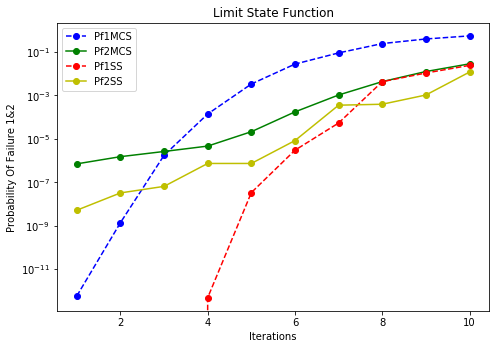

In [22]:
axes1=plt.figure().add_axes([0,0,1,1])
axes1.set_yscale('log')
xaxis=[1,2,3,4,5,6,7,8,9,10]
axes1.plot(xaxis,pf1m,'bo--',label="Pf1MCS")
axes1.plot(xaxis,pf2m,'go-',label="Pf2MCS")
axes1.plot(xaxis,pf1,'ro--',label="Pf1SS")
axes1.plot(xaxis,pf2,'yo-',label="Pf2SS")
axes1.set_xlabel("Iterations")
axes1.set_ylabel("Probability Of Failure 1&2")
axes1.set_title('Limit State Function')
axes1.legend()